In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Example data

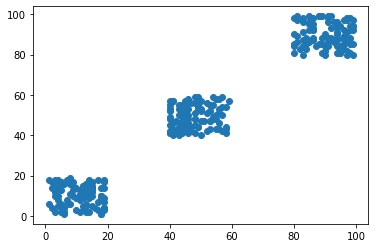

In [3]:
a = np.random.randint(1,20,(100,2))
b = np.random.randint(40,60,(100,2))  
c = np.random.randint(80,100,(100,2))  
r_arr=np.concatenate((a,b,c))
plt.scatter(r_arr[:,0],r_arr[:,1])
plt.show()

## Quick implementation

In [6]:
def k_means(arr,clusters=2,growth_limit=1,iteration_limit=500):
    """
    arr - the array to create clusters for, numpy arr
    clusters - number of clusters, int, optional
    growth_limit - a percentage score for the accuracy of the algorithm, float, optional
    iteration_limit - a limit for the maximum amount of iterations that should be attempted, int, optional"""
    iteration=0
    # create random centroids
    arr_shape = list(arr.shape)
    cluster_group = np.zeros((arr_shape[0]))
    cluster_shape = arr_shape.copy()
    cluster_shape[0]=clusters
    cluster_shape = tuple(cluster_shape)
    print(cluster_shape)
    cluster_chg_arr = np.zeros((clusters))
    arr_max = int(np.max(arr))
    arr_min = int(np.min(arr))
    # if the max is 1 then ensure the max and min aren't the same
    if arr_max==arr_min:
        arr_min = 0
    centroid_arr = np.random.randint(arr_min,arr_max,cluster_shape)
    #print(cluster_group)
    growth = 100
    # while growth is less than growth_limit - loop
    while growth>growth_limit:
        iteration+=1
        if iteration>iteration_limit:
            print("Algorithm break")
            print(centroid_arr)
            break
        # assign all points to the closest centroid
        item_int = 0
        for x in arr:
            centroid_distance=list(np.sum((centroid_arr-x)**2,axis=1)**0.5)
            cluster_group[item_int]=int(centroid_distance.index(np.min(centroid_distance)))
            item_int+=1
        # change centroid to be the average of all the points assigned to it
        old_centroid = centroid_arr.copy()
        for x in range(0,clusters):
            mean_arr = np.mean(arr[cluster_group==x],axis=0)
            centroid_arr[x]=mean_arr.copy()
        # calculate the amount centroids have changed
        centroid_chg=np.sum((centroid_arr-old_centroid)**2,axis=1)**0.5
        if np.sum(centroid_chg)==0:
            print("Centroids not changing")
            break
        growth = np.absolute(100*((np.sum(centroid_chg)-np.sum(cluster_chg_arr))/np.sum(cluster_chg_arr)))
        if np.isnan(growth):
            #print("Is NAN")
            growth=100
        #rint(growth)
        cluster_chg_arr=centroid_chg
    print("Algorithm finished. Centroids returned:")
    print(centroid_arr)
    return centroid_arr

## Plot of centre points

(3, 2)
Centroids not changing
Algorithm finished. Centroids returned:
[[10 10]
 [90 89]
 [48 49]]


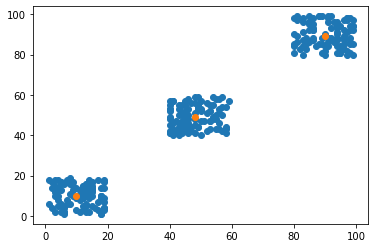

In [7]:
centroid_arr=k_means(r_arr,clusters=3,growth_limit=1)
plt.scatter(r_arr[:,0],r_arr[:,1])
plt.scatter(centroid_arr[:,0],centroid_arr[:,1])
plt.show()

In [8]:
def k_medians(arr,clusters=2,growth_limit=1,iteration_limit=500):
    """
    arr - the array to create clusters for, numpy arr
    clusters - number of clusters, int, optional
    growth_limit - a percentage score for the accuracy of the algorithm, float, optional
    iteration_limit - a limit for the maximum amount of iterations that should be attempted, int, optional"""
    iteration=0
    # create random centroids
    arr_shape = list(arr.shape)
    cluster_group = np.zeros((arr_shape[0]))
    cluster_shape = arr_shape.copy()
    cluster_shape[0]=clusters
    cluster_shape = tuple(cluster_shape)
    print(cluster_shape)
    cluster_chg_arr = np.zeros((clusters))
    arr_max = int(np.max(arr))
    arr_min = int(np.min(arr))
    # if the max is 1 then ensure the max and min aren't the same
    if arr_max==arr_min:
        arr_min = 0
    centroid_arr = np.random.randint(arr_min,arr_max,cluster_shape)
    #print(cluster_group)
    growth = 100
    # while growth is less than growth_limit - loop
    while growth>growth_limit:
        iteration+=1
        if iteration>iteration_limit:
            print("Algorithm break")
            print(centroid_arr)
            break
        # assign all points to the closest centroid
        item_int = 0
        for x in arr:
            centroid_distance=list(np.sum(np.absolute(centroid_arr-x),axis=1))
            cluster_group[item_int]=int(centroid_distance.index(np.min(centroid_distance)))
            item_int+=1
        # change centroid to be the average of all the points assigned to it
        old_centroid = centroid_arr.copy()
        for x in range(0,clusters):
            mean_arr = np.median(arr[cluster_group==x],axis=0)
            centroid_arr[x]=mean_arr.copy()
        # calculate the amount centroids have changed
        centroid_chg=np.sum((centroid_arr-old_centroid)**2,axis=1)**0.5
        if np.sum(centroid_chg)==0:
            print("Centroids not changing")
            break
        growth = np.absolute(100*((np.sum(centroid_chg)-np.sum(cluster_chg_arr))/np.sum(cluster_chg_arr)))
        if np.isnan(growth):
            #print("Is NAN")
            growth=100
        #rint(growth)
        cluster_chg_arr=centroid_chg
    print("Algorithm finished. Centroids returned:")
    print(centroid_arr)
    return centroid_arr

## K-Median Plot

(3, 2)
Centroids not changing
Algorithm finished. Centroids returned:
[[11 10]
 [48 49]
 [91 88]]


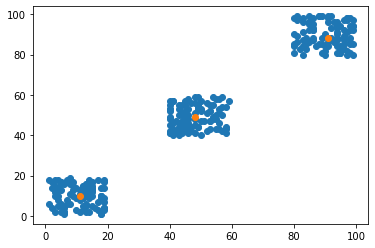

In [16]:
centroid_arr=k_medians(r_arr,clusters=3,growth_limit=1)
plt.scatter(r_arr[:,0],r_arr[:,1])
plt.scatter(centroid_arr[:,0],centroid_arr[:,1])
plt.show()